<a href="https://colab.research.google.com/github/abhishhari/Research-Project/blob/main/Burst_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Burst Detection using simple SVM

In [2]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

<ipython-input-13-01bea99132e3>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


Threshold X Total: 427.95454545454544
Threshold Z Total: 80.5
T-statistic X Total: [2.53592058]
P-value X Total: [0.03192374]
The bursts in X Total are statistically different from the threshold.
T-statistic Z Total: [2.30248378]
P-value Z Total: [0.06955649]
The bursts in Z Total are statistically different from the threshold.


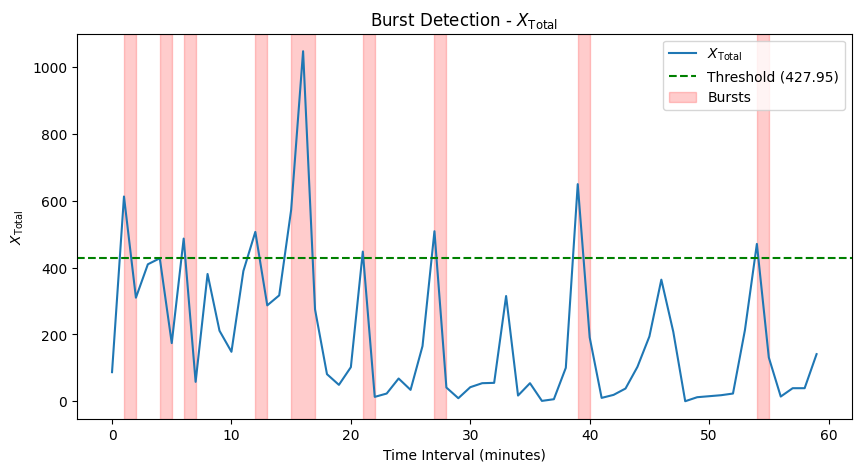

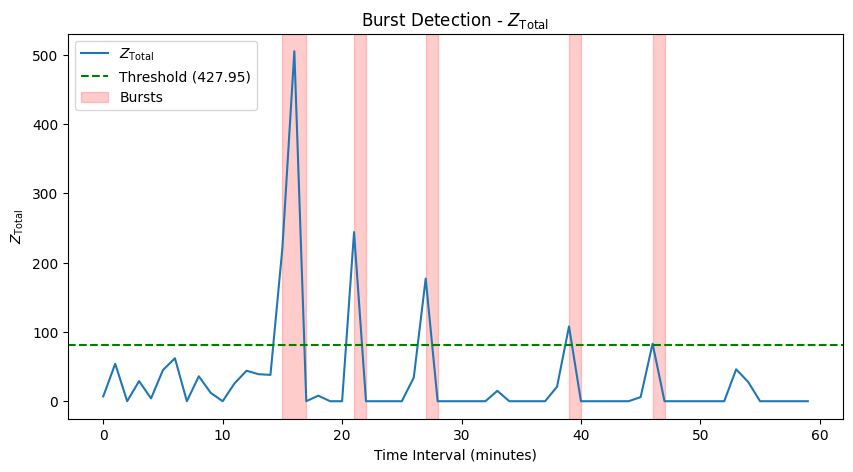

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import stats

# Loading the data and fill in any missing values with the median
data = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Untitled folder/lightphase/Group 0/control35.csv')
data.fillna(data.median(), inplace=True)

# Defining the features and target
X_total = data[['X Total']].values
Z_total = data[['Z Total']].values
y = (X_total > X_total.mean()).astype(int).ravel()

# Training an SVM classifier with hyperparameters
clf = svm.SVC(kernel='linear', C=1, gamma='scale')
clf.fit(X_total, y)

# Making predictions for the entire dataset
y_pred = clf.predict(X_total)

# Setting a threshold for detecting bursts on X Total
threshold_x = X_total[y_pred == 1].mean()
print('Threshold X Total:', threshold_x)

# Detecting bursts on X Total
bursts_x = []
start = None
for i in range(len(X_total)):
    if X_total[i] > threshold_x:
        if start is None:
            start = i
    elif start is not None:
        bursts_x.append((start, i))
        start = None

# Setting a threshold for detecting bursts on Z Total
threshold_z = Z_total[y_pred == 1].mean()
print('Threshold Z Total:', threshold_z)

# Detecting bursts on Z Total
bursts_z = []
start = None
for i in range(len(Z_total)):
    if Z_total[i] > threshold_z:
        if start is None:
            start = i
    elif start is not None:
        bursts_z.append((start, i))
        start = None

# Perform one-sample t-test on X Total bursts
burst_values_x = []
for burst in bursts_x:
    burst_values_x.extend(X_total[burst[0]:burst[1]])

t_statistic_x, p_value_x = stats.ttest_1samp(burst_values_x, threshold_x)

print('T-statistic X Total:', t_statistic_x)
print('P-value X Total:', p_value_x)
alpha = 0.05  # significance level

if p_value_x < alpha:
    print('The bursts in X Total are statistically different from the threshold.')
else:
    print('The bursts in X Total are not statistically different from the threshold.')
# Perform one-sample t-test on Z Total bursts
burst_values_z = []
for burst in bursts_z:
    burst_values_z.extend(Z_total[burst[0]:burst[1]])

t_statistic_z, p_value_z = stats.ttest_1samp(burst_values_z, threshold_z)

print('T-statistic Z Total:', t_statistic_z)
print('P-value Z Total:', p_value_z)
alpha = 0.05  # significance level

if p_value_x < alpha:
    print('The bursts in Z Total are statistically different from the threshold.')
else:
    print('The bursts in Z Total are not statistically different from the threshold.')
# Plotting the bursts for X Total
plt.figure(figsize=(10, 5))
plt.plot(X_total, label='X Total')
plt.axhline(y=threshold_x, color='green', linestyle='--', label='Threshold X Total')
for burst in bursts_x:
    plt.axvspan(burst[0], burst[1], color='red', alpha=0.2, label='Bursts X Total')
plt.title('Burst Detection - $X_{\mathrm{Total}}$')
plt.xlabel('Time Interval (minutes)')
plt.ylabel(r'$X_{\mathrm{Total}}$')
plt.legend(labels=[r'$X_{\mathrm{Total}}$', f'Threshold ({threshold:.2f})','Bursts'])
plt.show()

# Plotting the bursts for Z Total
plt.figure(figsize=(10, 5))
plt.plot(Z_total, label='Z Total')
plt.axhline(y=threshold_z, color='green', linestyle='--', label='Threshold Z Total')
for burst in bursts_z:
    plt.axvspan(burst[0], burst[1], color='red', alpha=0.2, label='Bursts Z Total')
plt.title('Burst Detection - $Z_{\mathrm{Total}}$')
plt.xlabel('Time Interval (minutes)')
plt.ylabel(r'$Z_{\mathrm{Total}}$')
plt.legend(labels=[r'$Z_{\mathrm{Total}}$', f'Threshold ({threshold:.2f})','Bursts'])
plt.show()


In [ ]:
# Function to extract bursts
def extract_bursts(X, threshold):
    bursts = []
    start = None
    for i in range(len(X)):
        if X[i] > threshold:
            if start is None:
                start = i
        elif start is not None:
            bursts.append((start, i, X[start:i].max() - X[start:i].min()))
            start = None
    return bursts

# Load the data and fill in any missing values with the median
folder_path = '/content/drive/MyDrive/Project/Dataset/Untitled folder/darkphase/group50/'
files = ['50mg23.csv','50mg24.csv','50mg25.csv','50mg26.csv','50mg27.csv','50mg28.csv','50mg31.csv','50mg32.csv','50mg33.csv','50mg34.csv']  # List of files in the folder
 # List to store the results
results = [] 
for file in files:
    data = pd.read_csv(folder_path + file)
    data.fillna(data.median(), inplace=True)
    
    # Define the features and target
    X = data[['X Total']].values
    y = (X > X.mean()).astype(int).ravel()

    # Train an SVM classifier with hyperparameters
    clf = svm.SVC(kernel='linear', C=1, gamma='scale')
    clf.fit(X, y)

    # Make predictions for the entire dataset
    y_pred = clf.predict(X)

    # Set a threshold for detecting bursts
    threshold = X[y_pred == 1].mean()
    print('Threshold for', file, ':', threshold)
    
    # Extract bursts and calculate number, duration, and amplitude
    bursts = extract_bursts(X.ravel(), threshold)
    num_bursts = len(bursts)
    if num_bursts > 0:
        burst_durations = np.array([burst[1] - burst[0] for burst in bursts])
        burst_amplitudes = np.array([burst[2] for burst in bursts])
        mean_duration = burst_durations.mean()
        std_duration = burst_durations.std()
        mean_amplitude = burst_amplitudes.mean()
        std_amplitude = burst_amplitudes.std()
    else:
        mean_duration = std_duration = mean_amplitude = std_amplitude = 0
    
    # Store the results in a list
    results.append([file, num_bursts, mean_duration, std_duration, mean_amplitude, std_amplitude])

# Saving the results to a CSV file
results_df = pd.DataFrame(results, columns=['File', 'Num_Bursts', 'Mean_Duration', 'Std_Duration', 'Mean_Amplitude', 'Std_Amplitude'])
results_df.to_csv('burst_features.csv', index=False)


<ipython-input-128-9666667be336>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)
<ipython-input-128-9666667be336>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


Threshold for 50mg23.csv : 404.60714285714283
Threshold for 50mg24.csv : 779.2941176470588


<ipython-input-128-9666667be336>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


Threshold for 50mg25.csv : 880.85


<ipython-input-128-9666667be336>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


Threshold for 50mg26.csv : 637.8421052631579


<ipython-input-128-9666667be336>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)
<ipython-input-128-9666667be336>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


Threshold for 50mg27.csv : 578.375
Threshold for 50mg28.csv : 689.6896551724138


<ipython-input-128-9666667be336>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)
<ipython-input-128-9666667be336>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


Threshold for 50mg31.csv : 766.0
Threshold for 50mg32.csv : 703.4761904761905


<ipython-input-128-9666667be336>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)
<ipython-input-128-9666667be336>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


Threshold for 50mg33.csv : 655.7826086956521
Threshold for 50mg34.csv : 774.4285714285714
